# DECISION TREES

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Reading the Data

In [2]:
df = pd.read_csv(r"C:\Users\kakem\Desktop\ML IMPLEMENTATIONS\Implementations\datasets\titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Lname        156 non-null    object 
 4   Name         156 non-null    object 
 5   Sex          156 non-null    object 
 6   Age          126 non-null    float64
 7   SibSp        156 non-null    int64  
 8   Parch        156 non-null    int64  
 9   Ticket       156 non-null    object 
 10  Fare         156 non-null    float64
 11  Cabin        31 non-null     object 
 12  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 16.0+ KB


## Cleaning the Data

In [5]:
df.drop(columns=['PassengerId','Lname', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  156 non-null    int64  
 1   Pclass    156 non-null    int64  
 2   Sex       156 non-null    object 
 3   Age       126 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.0+ KB


In [14]:
age_mean = np.mean(df.Age)
df.Age.replace(np.nan, round(age_mean, 0), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  156 non-null    int64  
 1   Pclass    156 non-null    int64  
 2   Sex       156 non-null    object 
 3   Age       156 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.0+ KB


In [15]:
gender = pd.get_dummies(df['Sex'])

In [16]:
new_df = pd.concat([df, gender], axis=1)
new_df.drop(['Sex'], axis=1, inplace=True)
new_df.head(5)

,Survived,Pclass,Age,female,male
0,0,3,22.0,0,1
1,1,1,38.0,1,0
2,1,3,26.0,1,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1


In [18]:
X = new_df[['Pclass','Age', 'female', 'male']]
y = new_df['Survived']

,Pclass,Age,female,male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0
3,1,35.0,1,0
4,3,35.0,0,1
...,...,...,...,...
151,1,22.0,1,0
152,3,55.5,0,1
153,3,40.5,0,1
154,3,28.0,0,1


## Splitting and training the Model

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [42]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_leaf=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

## Making Predictions using the Model

[Text(0.5, 0.9166666666666666, 'X[2] <= 0.5\nentropy = 0.934\nsamples = 117\nvalue = [76, 41]'),
 Text(0.26, 0.75, 'X[1] <= 34.5\nentropy = 0.66\nsamples = 76\nvalue = [63, 13]'),
 Text(0.22, 0.5833333333333334, 'X[1] <= 26.5\nentropy = 0.768\nsamples = 58\nvalue = [45, 13]'),
 Text(0.08, 0.4166666666666667, 'X[1] <= 14.0\nentropy = 0.48\nsamples = 29\nvalue = [26, 3]'),
 Text(0.04, 0.25, 'entropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.12, 0.25, 'X[0] <= 1.5\nentropy = 0.25\nsamples = 24\nvalue = [23, 1]'),
 Text(0.08, 0.08333333333333333, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.16, 0.08333333333333333, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.36, 0.4166666666666667, 'X[0] <= 2.5\nentropy = 0.929\nsamples = 29\nvalue = [19, 10]'),
 Text(0.28, 0.25, 'X[1] <= 28.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.24, 0.08333333333333333, 'entropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.32, 0.08333333333333333, 'entropy = 0.811\nsamp

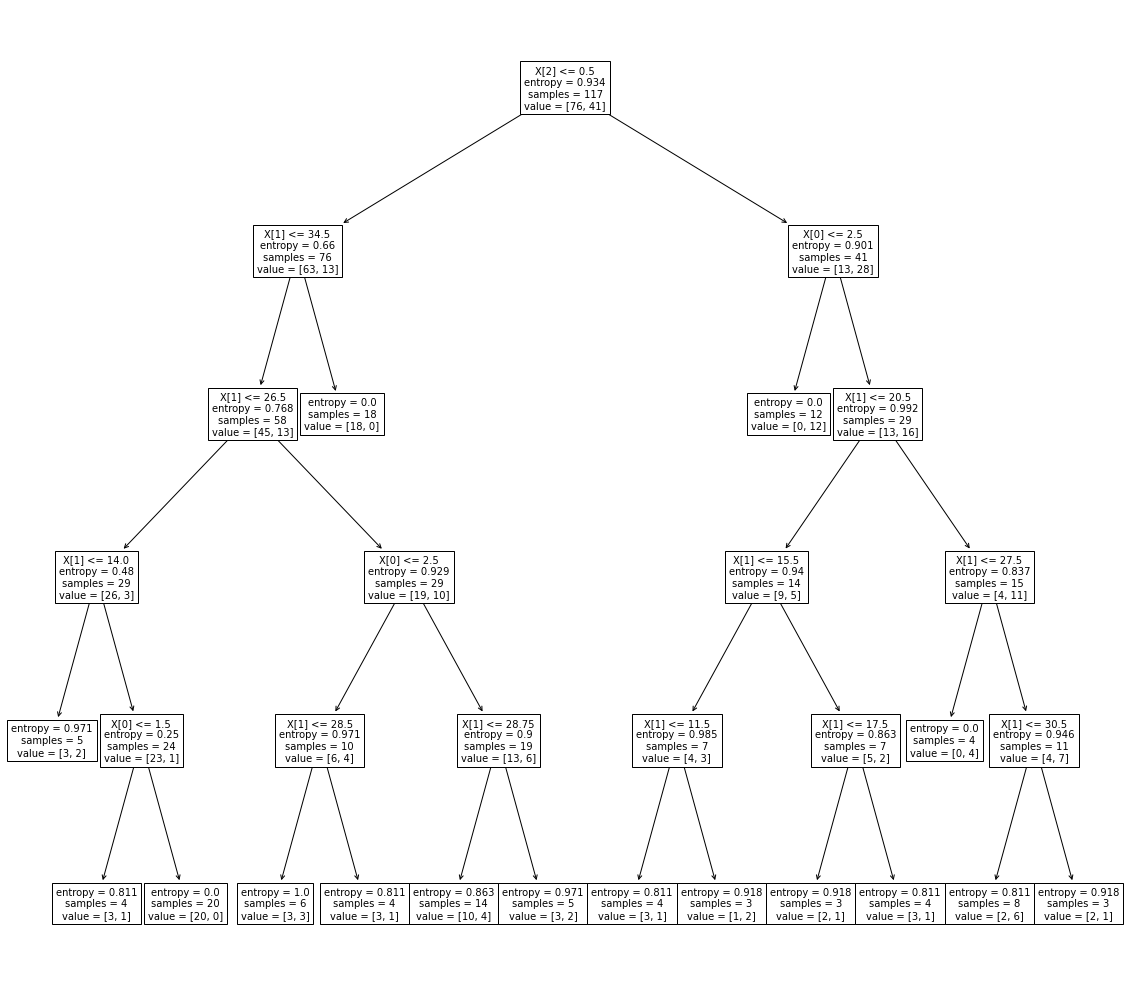

In [43]:
plt.figure(figsize=(20,18)) #used to increase the size of any plot
plot_tree(model)

In [44]:
y_pred = model.predict(X_test) 

## Evaluation of results

In [45]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy}\n Precision : {precision}\n Recall : {recall}\n F1_score : {f1_score}")

Accuracy : 0.8974358974358975
 Precision : 0.8461538461538461
 Recall : 0.8461538461538461
 F1_score : 0.8461538461538461


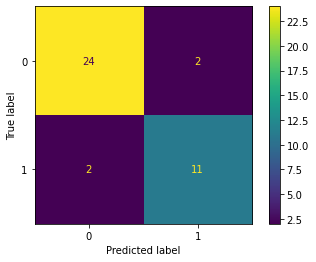

In [46]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()

In [48]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.85      0.85      0.85        13

    accuracy                           0.90        39
   macro avg       0.88      0.88      0.88        39
weighted avg       0.90      0.90      0.90        39

